<a href="https://colab.research.google.com/github/Sid-9823/Health-Insurance-Cross-Sell-Prediction/blob/main/Health_Insurance_Cross_Sell_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  <u>**Project Title : Health Insurance Cross Sell Prediction**</u>
#####**Project Type** - Classification

#####**Contribution** - Individual

#####**Individual name** - Siddhant Pal

#####**Cohort** - Berlin

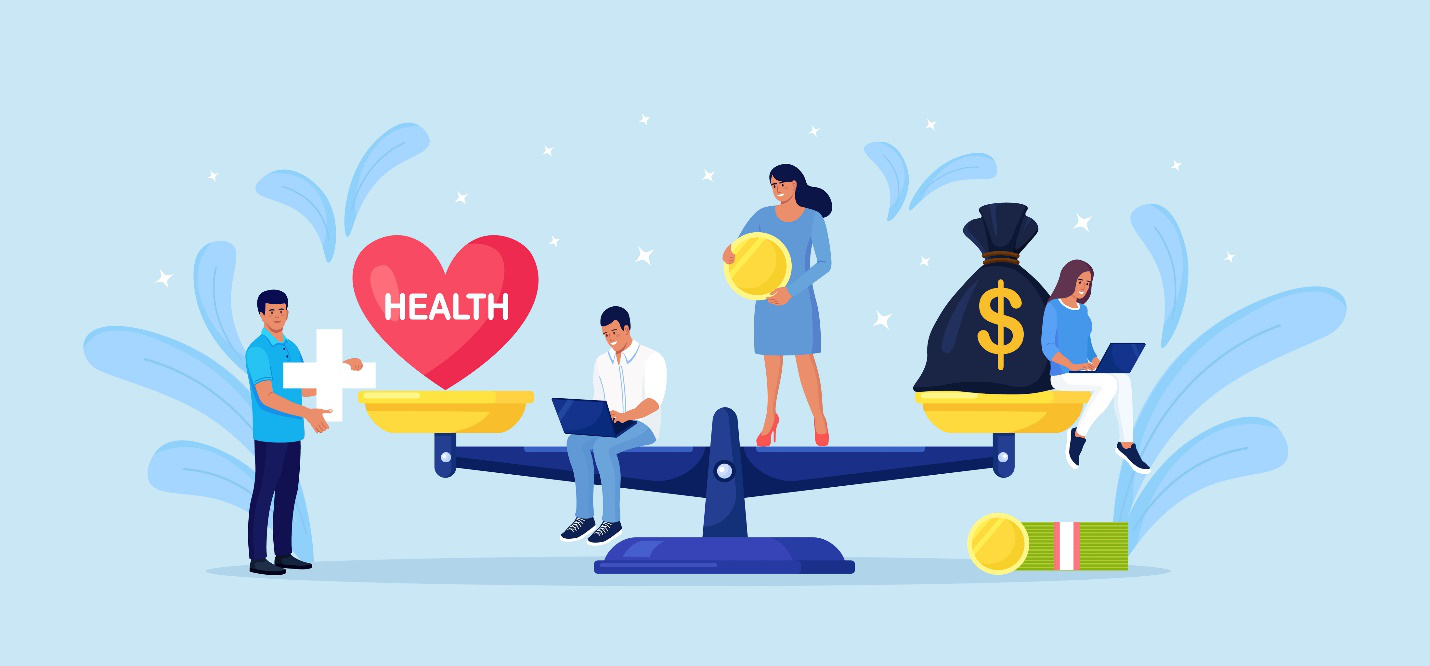

#**Project Summary**

#**GitHub Link**

#**Problem statement**

**BUSINESS PROBLEM OVERVIEW**

Our client is an Insurance company that specialises in various types of insurance, and now they need our help in building a model that will predict if a
A policyholder (an existing customer) with Health Insurance is also interested in vehicle insurance.

To build this model, we have data regarding each customer, such as ID, Gender, age, driving licence, vehicle age, vehicle damage, etc.

### **Data Description**

**The dataset contains user information such as ID, Gender, Age, Driving License, Region_Code, Previously_insured, Vehicle_age, Vehicle_damage, Annual_premium, PolicySalesChannel, Vintage and Response.**

**Feature's Information :**
* ***id*** : *Unique ID for customer.*

* ***Gender*** : *Male / Female.*
* ***Age*** : *Age of customer.*
* ***Driving License*** : *Customer has DL or not*
* ***Region_code*** : *Unique code for the region of the customer.*
* ***Previously_insured*** : *Customer already has a vehicle insurance or not.*
* ***Vehicle_age*** : *Age of the vehicle*
* ***Vehicle_damage*** : *Past damages present or not*
* ***Annual_premium*** : *The amount customer needs to pay as premium.*
* ***PolicySalesChannel*** : *Anonymized Code for the channel of outreaching to the customer i.e Different Agents, Over Mail, Over Phone, In Person, etc.*
* ***Vintage*** : *Number of days, Customer has been associated with the company.*
* ***Response*** : *Customer is interested or not.*

#**Importing necessary libraries**

In [4]:
# For numerical python, calculation and data manipulation.

import numpy as np
import pandas as pd

# For plotting plots and graphs.

import matplotlib.pyplot as plt
import seaborn as sns

# For pre-processing.

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# For Hypothesis Testing.

from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f

# For Model Implementation.

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# For evaluation.

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# For Model Explainibility.

!pip install shap
import shap
import graphviz
sns.set_style('darkgrid')

# For removing warning errors.

import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 10.2 MB/s eta 0:00:00


# **Data collection and analysis**

##**Data Loading and Basic Analysis**

In [107]:
# Loading the data from csv file to a pandas dataframe.

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

In [108]:
# Printing first 5 rows.

df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [109]:
 # Printing last 5 rows.

df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [110]:
# Checking the number of rows and columns in our dataset.

df.shape

(381109, 12)

In [111]:
# Gathering information about our dataset such as null count values and data types involved.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [112]:
#  Getting the statistical measure of the dataframe.

df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [113]:
# Printing number of unique values in our dataset.

df.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [114]:
# Checking null values.

df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

* ***As we can see there are no missing values in this dataframe***

##**Data wrangling**

In [115]:
# Renaming our column's.

df = df.rename(columns={'Gender':'gen','Age':'age','Driving_License':'dl','Region_Code':'rc','Previously_Insured':'pi','Vehicle_Age':'va',
                        'Vehicle_Damage':'vd','Annual_Premium':'ap','Policy_Sales_Channel':'psc','Vintage':'vint','Response':'res'})

* ***Changing column's names as per our convenience as it becomes easier working with small feature names.***

In [116]:
# Dropping 'id' column as it's of no use in model building.

df.drop(['id'],axis=1,inplace=True)

In [117]:
# Converting values in 'Driving License' and 'Previously Insured' column (1 = Yes else No).

df['dl'] = df['dl'].apply(lambda x: "Yes" if x==1 else "No")
df['pi'] = df['pi'].apply(lambda x: "Yes" if x==1 else "No")

In [118]:
df.head()

,gen,age,dl,rc,pi,va,vd,ap,psc,vint,res
0,Male,44,Yes,28.0,No,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,Yes,3.0,No,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,Yes,28.0,No,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,Yes,11.0,Yes,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,Yes,41.0,Yes,< 1 Year,No,27496.0,152.0,39,0


In [119]:
# Changing dtypes of these column's from float to integer.

df['ap']  = df['ap'].astype(int)
df['psc'] = df['psc'].astype(int)
df['rc']  = df['rc'].astype(int)

In [120]:
# Storing our numerical and categorical feature's in these variables.

numf = df.select_dtypes(exclude='object')  # Numerical feature's
catf = df.select_dtypes(include='object')  # Categorical feature's

In [121]:
# Checking our numerical feature's.

numf.head()

,age,rc,ap,psc,vint,res
0,44,28,40454,26,217,1
1,76,3,33536,26,183,0
2,47,28,38294,26,27,1
3,21,11,28619,152,203,0
4,29,41,27496,152,39,0


In [122]:
# Checking our categorical feature's.

catf.head()

,gen,dl,pi,va,vd
0,Male,Yes,No,> 2 Years,Yes
1,Male,Yes,No,1-2 Year,No
2,Male,Yes,No,> 2 Years,Yes
3,Male,Yes,Yes,< 1 Year,No
4,Female,Yes,Yes,< 1 Year,No


# **Exploratory Data Analysis and Visualization**

**What is EDA ?**

***Exploratory Data Analysis can be considered as a process which is used to visualise data and it helps to uncover the underlying pattern and relations between the dependent and independent variable's which can be useful in decision making.***

**We are performing the Vizualization in  a structured way while following "UBM" Rule.**

**U - Univariate Analysis,**

**B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)**

**M - Multivariate Analysis**

##**Univariate Analysis**

***We can define a univariate analysis as the type of analysis in which single feature analysis is performed. This type of analysis is solely focused on the distribution and pattern of the datapoints in a dataset.***

###**Gender**

Text(0.5, 1.0, 'Number of policy holders in different genders')

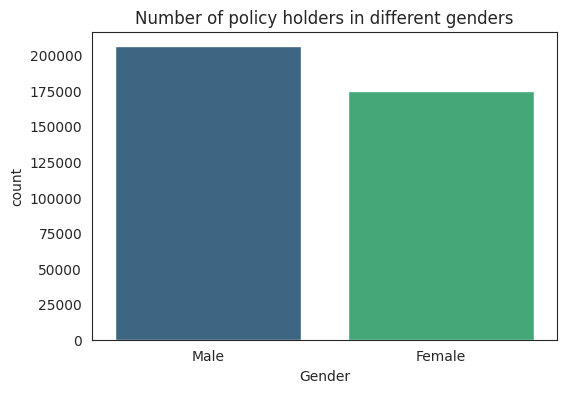

In [21]:
# Plotting a countplot for this column.

sns.set_style(style='white')
plt.figure(figsize=(6,4))
sns.countplot(x=df['gen'],palette='viridis')
plt.xlabel('Gender')
plt.title('Number of policy holders in different genders')

* ***There are more number of males as compared to females in our dataset.***

In [22]:
# Printing the total numbers of each category.

df['gen'].value_counts()

Male      206089
Female    175020
Name: gen, dtype: int64

* ***There are 206089 males and 175020 females present in our dataset.***

###**Driving License**

Text(0.5, 1.0, 'Number of policy holders having Driving License')

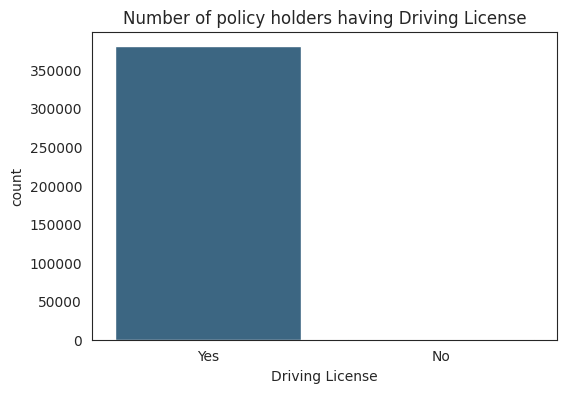

In [23]:
# Plotting a countplot for this column.

plt.figure(figsize=(6,4))
sns.countplot(x=df['dl'],palette='viridis')
plt.xlabel('Driving License')
plt.title('Number of policy holders having Driving License')

* ***As we can see from the above countplot, almost all of the policyholders in our dataset have driving licences.***

In [24]:
# Printing the total numbers of each category.

df['dl'].value_counts()

Yes    380297
No        812
Name: dl, dtype: int64

* ***There are only a very few people who do not have a driving licence, i.e., only 812 out of 381109.***

###**Age**

Text(0.5, 1.0, 'Distribution of Age')

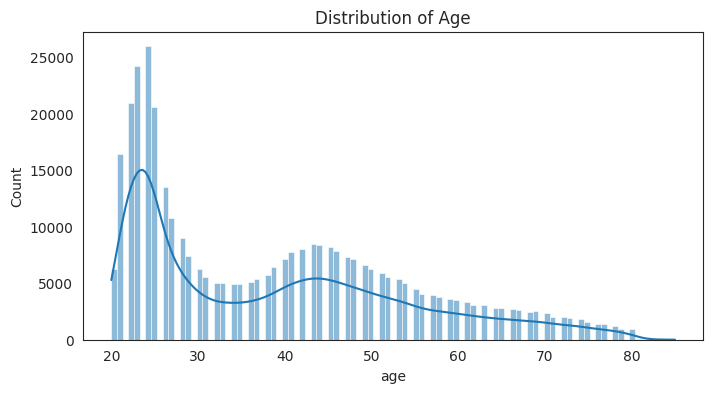

In [25]:
# Plotting a histogram plot for this column.

plt.figure(figsize=(8,4))
sns.histplot(x=df['age'],kde=True)
plt.title('Distribution of Age')

* ***We can conclude by the above distribution that age feature is moderately right skewed.***

Text(0.5, 1.0, 'Number of policy holders in different age groups')

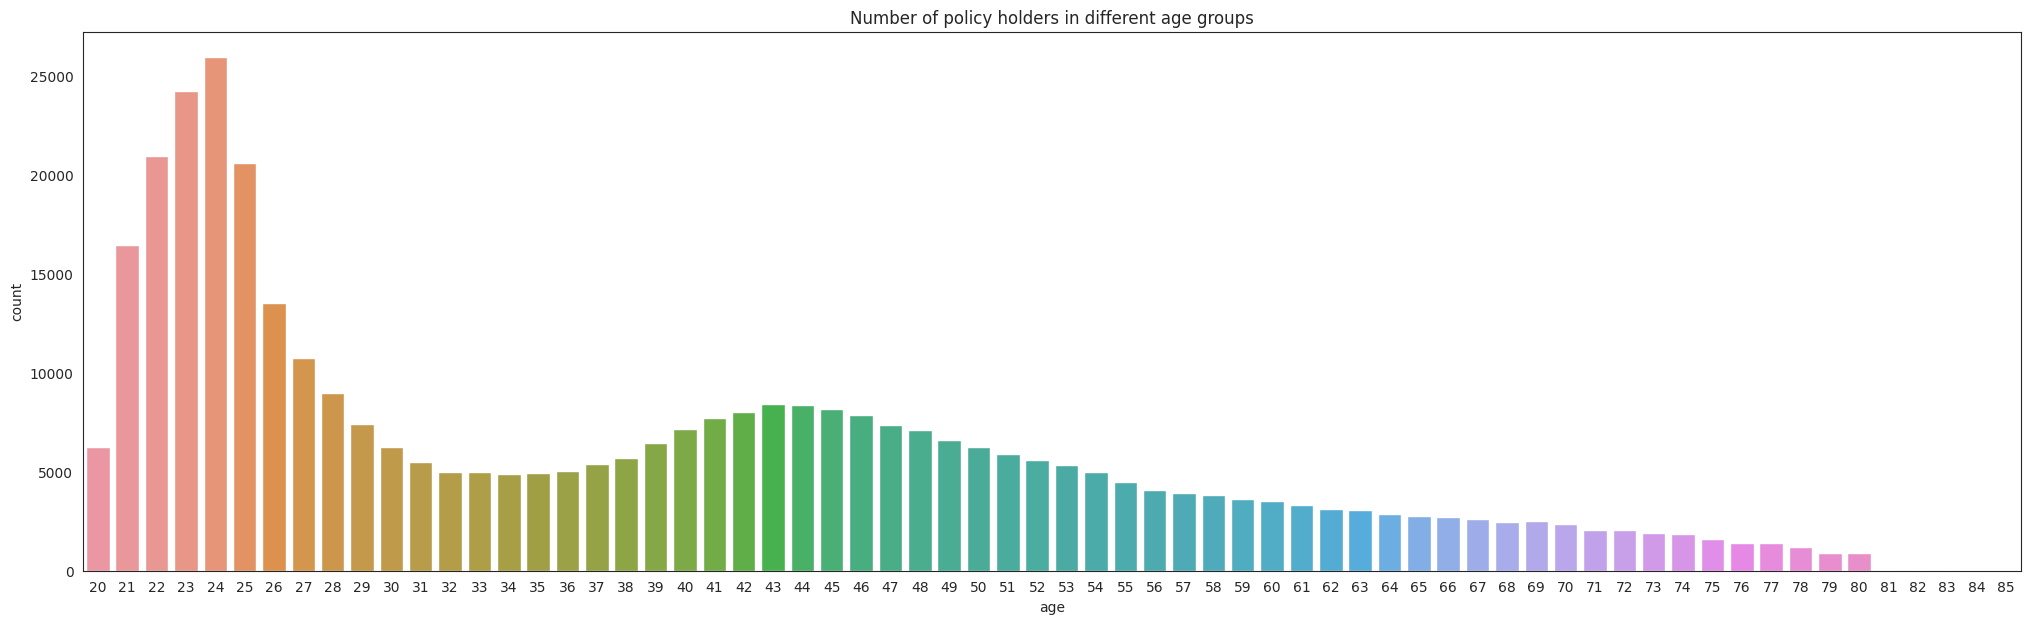

In [26]:
# Plotting a countplot plot for this column.

plt.figure(figsize=(25,7))
sns.countplot(x=df['age'])
plt.title('Number of policy holders in different age groups')

* ***We can conclude from the above countplot that the majority of our policyholders are young, aged 21 to 25.***

* ***While the minority mostly consists of older age-group customers.***

In [27]:
# Printing the total numbers in each age category.

a = pd.DataFrame(df['age'].value_counts(sort=True).reset_index())
pd.DataFrame(a.sort_index())

,index,age
0,24,25960
1,23,24256
2,22,20964
3,25,20636
4,21,16457
...,...,...
61,81,56
62,82,29
63,83,22
64,84,11


* ***We have 25960 policyholders aged 24 and almost the same stats for individuals aged 22 and 23.***

* ***While the least number only consists of 11 policyholders aged 84 and 85.***

###**Region Code**

Text(0.5, 1.0, "Number of policy holder's belonging from different regions")

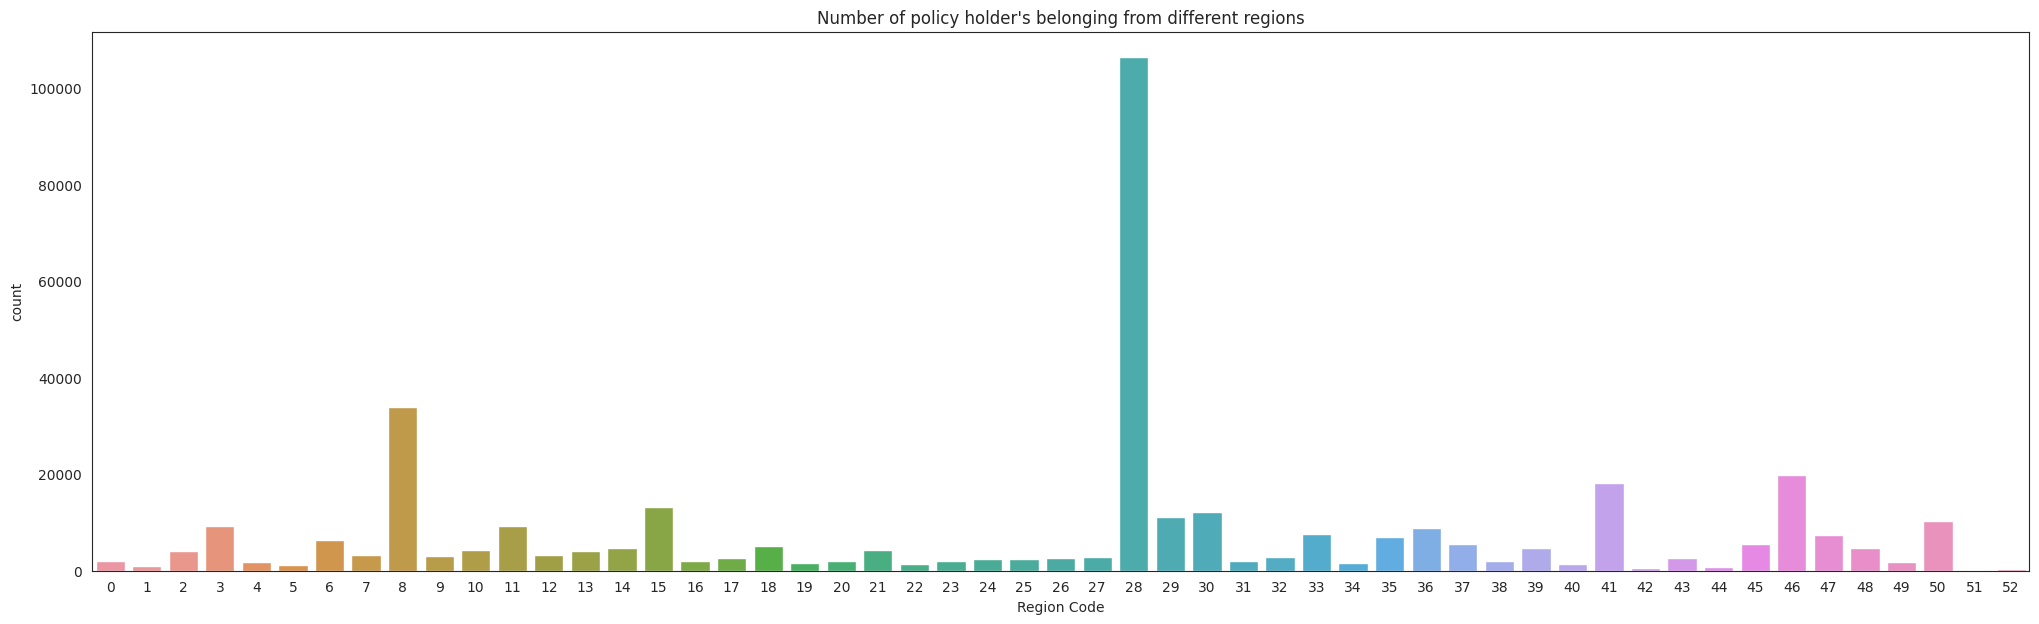

In [28]:
# Plotting a countplot plot for this column.

plt.figure(figsize=(25,7))
sns.countplot(x=df['rc'])
plt.xlabel('Region Code')
plt.title("Number of policy holder's belonging from different regions")

* ***We have around 106415 policyholders from the region whose code is 28.***

In [29]:
# Printing the total numbers in each Region Code category.

a = pd.DataFrame(df['rc'].value_counts(sort=True).reset_index())
pd.DataFrame(a.sort_index())

,index,rc
0,28,106415
1,8,33877
2,46,19749
3,41,18263
4,15,13308
5,30,12191
6,29,11065
7,50,10243
8,3,9251
9,11,9232


* ***While the least number of policyholders are from regions whose code is 52, i.e., only 183.***

###**Previously insured**

Text(0.5, 1.0, 'Number of people who already have Vehicle insurance')

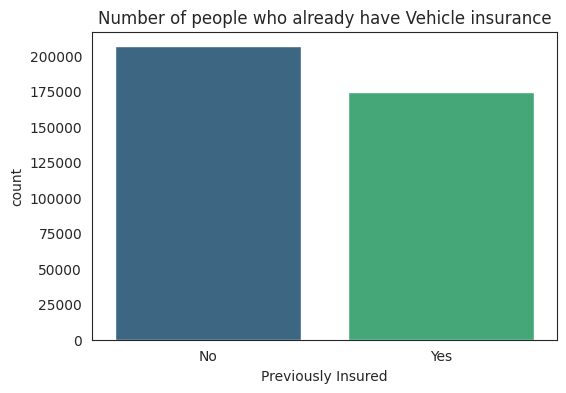

In [30]:
# Plotting a countplot plot for this column.

plt.figure(figsize=(6,4))
sns.countplot(x=df['pi'],palette='viridis')
plt.xlabel('Previously Insured')
plt.title('Number of people who already have Vehicle insurance')

* ***In the above countplot, we can see that there are more policy holders who don't have vehicle insurance.***

* ***These policyholders with no vehicle insurance could be company's potential target customers.***

In [31]:
# Printing the total numbers of each category.

df['pi'].value_counts()

No     206481
Yes    174628
Name: pi, dtype: int64

* ***There are 206481 policyholders with no vehicle insurance, while the number of individuals with vehicle insurance stands at 174628.***

###**Vehicle Age**

Text(0.5, 1.0, 'Age of the vehicle')

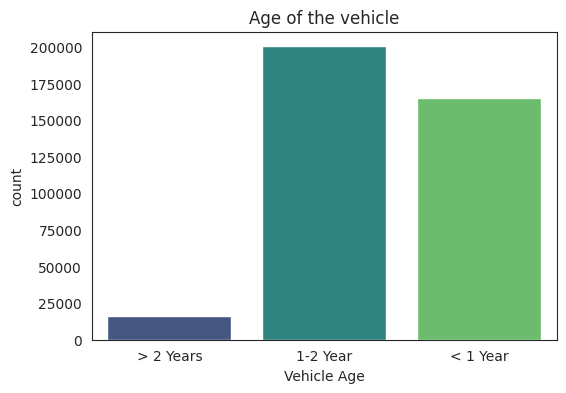

In [32]:
# Plotting a countplot plot for this column.

plt.figure(figsize=(6,4))
sns.countplot(x=df['va'],palette='viridis')
plt.xlabel('Vehicle Age')
plt.title('Age of the vehicle')

* ***The majority of our policy holders (200316) have a vehicle age of around 1 to 2 years.***

* ***There are also a high number of policy holders who have recently purchased their vehicle, i.e., 164786 individuals who have purchased a vehicle less than a year ago. These customers with new vehicles could most likely purchase vehicle insurance.***

* ***There are only about 16007 policyholders whose vehicles are older than 2 years.***

In [33]:
# Printing the total numbers of each category.

df['va'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: va, dtype: int64

###**Vehicle Damage**

Text(0.5, 1.0, 'Past damages present or not')

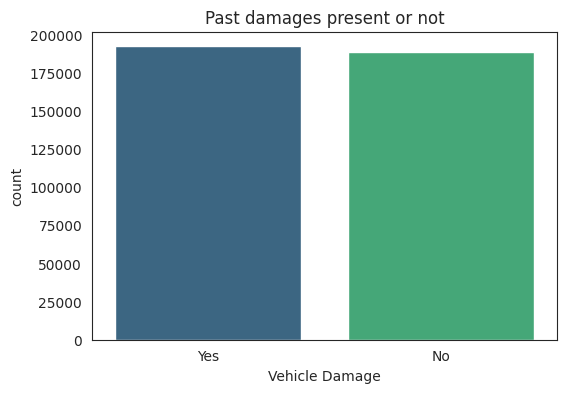

In [34]:
# Plotting a countplot plot for this column.

plt.figure(figsize=(6,4))
sns.countplot(x=df['vd'],palette='viridis')
plt.xlabel('Vehicle Damage')
plt.title('Past damages present or not')

* ***We can see from the above countplot that almost 50% of customers have vehicle damage, while the other 50% do not.***

In [35]:
# Printing the total numbers of each category.

df['vd'].value_counts()

Yes    192413
No     188696
Name: vd, dtype: int64

* ***1,92,413 customers have damage to their vehicles, while the other 1,88,696 do not have any damage.***

###**Annual Premium**

Text(0.5, 0, 'Annual Premium')

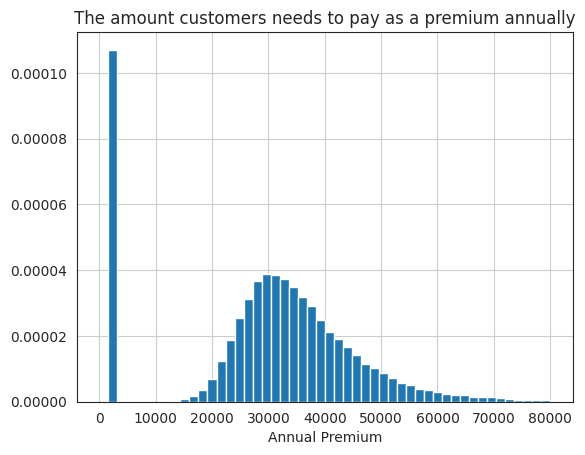

In [36]:
# Plotting a histogram plot for this column.

df['ap'].hist(bins = 50, density = True, range=[0, 80000])
plt.title('The amount customers needs to pay as a premium annually')
plt.xlabel('Annual Premium')

* ***We can see it is following a normal distribution.***

In [37]:
# Printing the total numbers in each annual premium category.

pd.DataFrame(df['ap'].value_counts(sort=True).reset_index())

,index,ap
0,2630,64877
1,69856,140
2,39008,41
3,38287,38
4,45179,38
...,...,...
48833,14838,1
48834,52535,1
48835,15182,1
48836,143525,1


* ***Out of all policy holders, many (64,877) of them are paying an annual premium of 2630, while the rest are paying between 20,000 and 60,000.***

###**PolicySalesChannel**

Text(0.5, 1.0, 'Distribution of values in Policy Sales Channel')

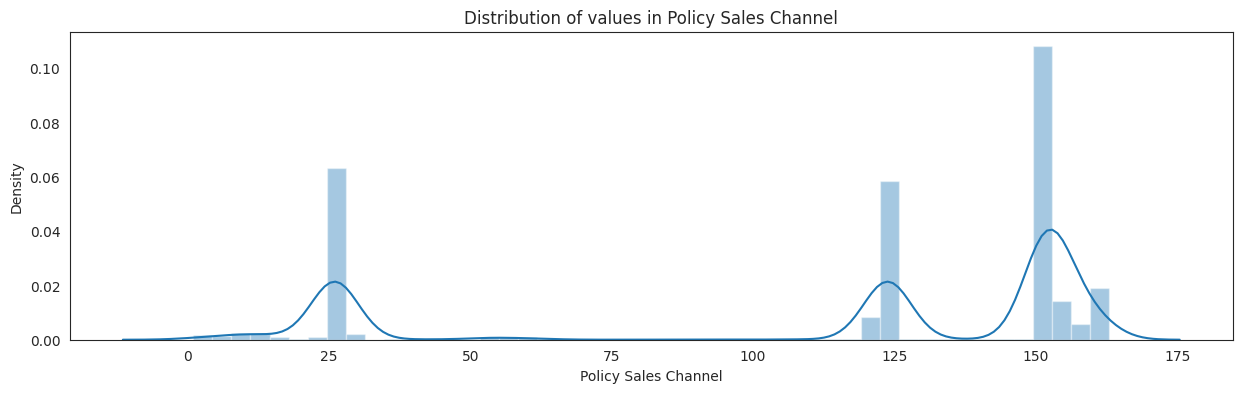

In [38]:
# Plotting a distribution plot for this column.

plt.figure(figsize=(15,4))
sns.distplot(x=df['psc'],kde=True)
plt.xlabel('Policy Sales Channel')
plt.title('Distribution of values in Policy Sales Channel')

* ***PolicySalesChannel of code 152 has the highest peak, followed by 26 and 124.***

In [39]:
# Printing the total numbers of each category.

df['psc'].value_counts(sort=True).head(20)

152    134784
26      79700
124     73995
160     21779
156     10661
122      9930
157      6684
154      5993
151      3885
163      2893
13       1865
25       1848
7        1598
8        1515
30       1410
55       1264
155      1234
11       1203
1        1074
52       1055
Name: psc, dtype: int64

* ***SalesChannel 152 has the highest number of customers, i.e., 1,34,784, followed by 26 (79,700) and 124 (73,995).***

###**Vintage**

Text(0.5, 1.0, 'Number of days customer has been associated with the company')

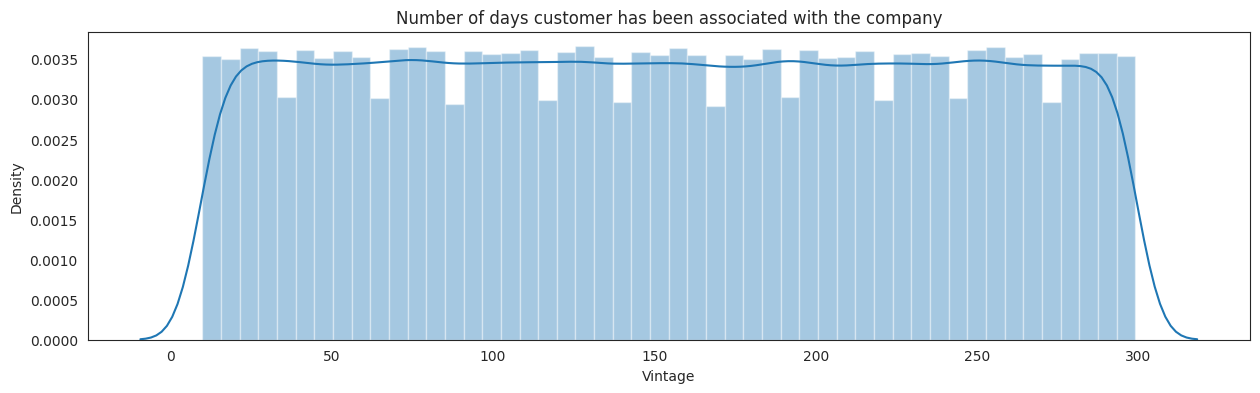

In [40]:
# Plotting a distribution plot for this column.

plt.figure(figsize=(15,4))
sns.distplot(x=df['vint'])
plt.xlabel('Vintage')
plt.title('Number of days customer has been associated with the company')

* ***The majority of the customers have been associated with the company for a longer period of time.***

In [41]:
# Printing the total numbers of each category.

pd.DataFrame(df['vint'].value_counts(sort=True).reset_index())

,index,vint
0,256,1418
1,73,1410
2,282,1397
3,158,1394
4,187,1392
...,...,...
285,205,1235
286,89,1234
287,32,1230
288,224,1227


###**Response**

Text(0.5, 1.0, 'Number of people interested in vehicle insurance')

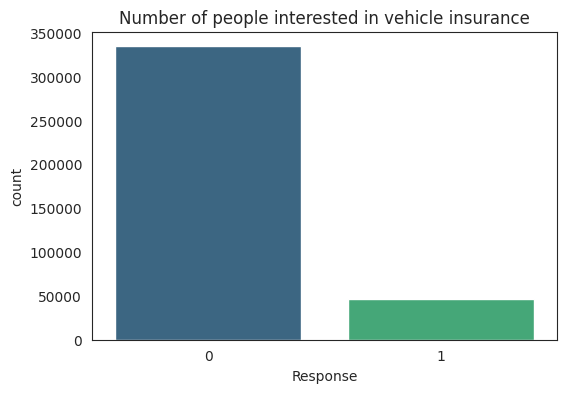

In [42]:
# Plotting a countplot plot for this column.

plt.figure(figsize=(6,4))
sns.countplot(x=df['res'],palette='viridis')
plt.xlabel('Response')
plt.title('Number of people interested in vehicle insurance')

* ***Majority of the customers are not interested in a vehicle insurance.***

In [43]:
# Printing the total numbers of each category.

df['res'].value_counts()

0    334399
1     46710
Name: res, dtype: int64

* ***Out of 3,81,109, only 46,710 are interested in vehicle insurance.***

## **Bivariate Analysis**

***A bivariate analysis is a type in which two variable's are taken into consideration and underlying relationship between the two is analysed.***

### **Analysis of Dependent variable vs. Categorical data type**

***Here, we are trying to find the underlying relationship's between dependent(Output) and independent variable's one by one. First, we will proceed with relationship's of dependent variable(Output) with categorical and object data type's then afterwards with numerical or integer data type's.***

####**Gender vs. Response**

Text(0.5, 1.0, 'Response of customers from each category')

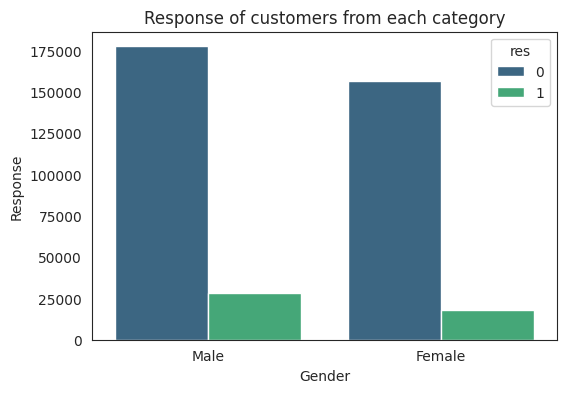

In [44]:
# Plotting a countplot.

plt.figure(figsize=(6,4))
sns.countplot(x='gen',hue = 'res',data=df,palette ='viridis')
plt.xlabel('Gender')
plt.ylabel('Response')
plt.title('Response of customers from each category')

* ***We are getting slightly higher positive responses from males as compared to females.***

In [45]:
# Printing the total numbers of each category.

df['gen'].value_counts()

Male      206089
Female    175020
Name: gen, dtype: int64

####**Driving License vs. Response**

Text(0.5, 1.0, 'Customers who have DL or not response')

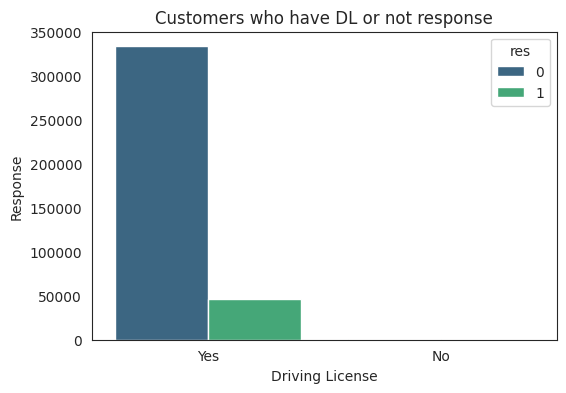

In [46]:
# Plotting a countplot.

plt.figure(figsize=(6,4))
sns.countplot(x='dl',hue='res',data=df,palette='viridis')
plt.xlabel('Driving License')
plt.ylabel('Response')
plt.title('Customers who have DL or not response')

* ***Every customer has a driving licence in our dataset.***

* ***There are few customers with DLs purchasing vehicle insurance.***

In [47]:
# Printing the total numbers of each category.

df['dl'].value_counts()

Yes    380297
No        812
Name: dl, dtype: int64

####**Previously Insured vs. Response**

Text(0.5, 1.0, 'Previously Insured customers response')

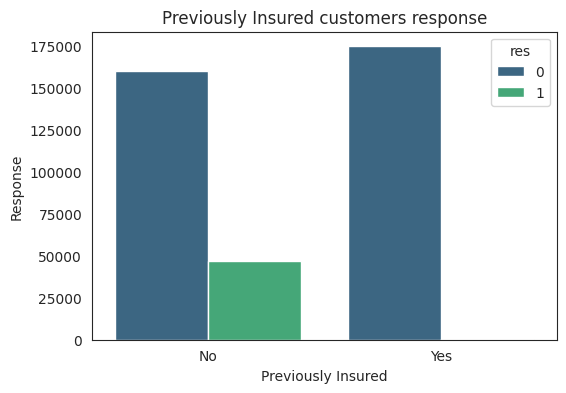

In [48]:
# Plotting a countplot.

plt.figure(figsize=(6,4))
sns.countplot(x='pi',hue = 'res',data=df,palette='viridis')
plt.xlabel('Previously Insured')
plt.ylabel('Response')
plt.title('Previously Insured customers response')

* ***Customers who already have vehicle insurance are not buying, obviously.***

* ***Few customers with no vehicle insurance are purchasing insurance.***

In [49]:
# Printing the total numbers of each category.

df['pi'].value_counts()

No     206481
Yes    174628
Name: pi, dtype: int64

####**Vehicle Age vs. Response**

Text(0.5, 1.0, 'Customers Vehicle Age and their response')

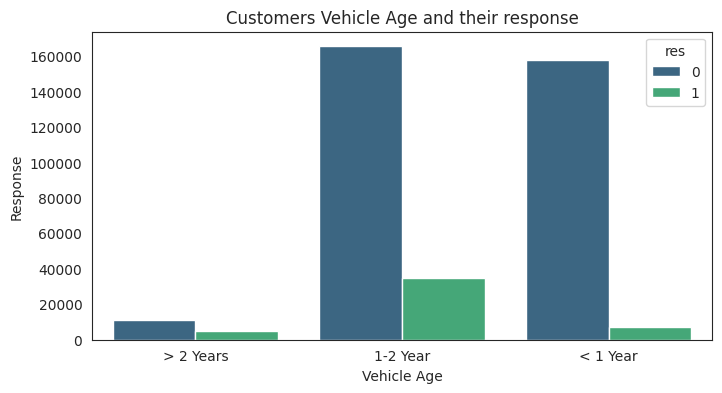

In [50]:
# Plotting a countplot.

plt.figure(figsize=(8,4))
sns.countplot(x='va',hue = 'res',data=df,palette='viridis')
plt.xlabel('Vehicle Age')
plt.ylabel('Response')
plt.title('Customers Vehicle Age and their response')

* ***Customers with a vehicle age of 0–1 years are purchasing vehicle insurance more as compared to customers with a vehicle age of less than 1 year or greater than 2 years.***

In [51]:
# Printing the total numbers of each category.

df['va'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: va, dtype: int64

####**Vehicle Damage vs. Response**

Text(0.5, 1.0, 'Customers Vehicle Damage and their response')

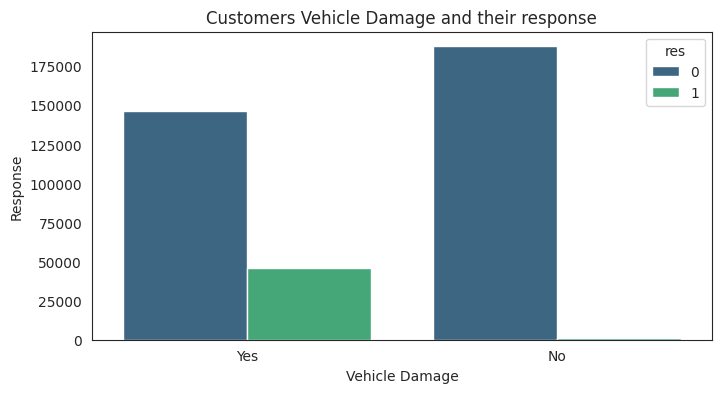

In [52]:
# Plotting a countplot.

plt.figure(figsize=(8,4))
sns.countplot(x='vd',hue = 'res',data=df,palette='viridis')
plt.xlabel('Vehicle Damage')
plt.ylabel('Response')
plt.title('Customers Vehicle Damage and their response')

* ***Customers with no vehicle damage are not purchasing vehicle insurance.***

* ***There are a few customers with vehicle damage who are purchasing vehicle insurance.***

In [53]:
# Printing the total numbers of each category.

df['vd'].value_counts()

Yes    192413
No     188696
Name: vd, dtype: int64

###**Analysis of Dependent variable vs. Numerical data type**

####**Age vs. Response**

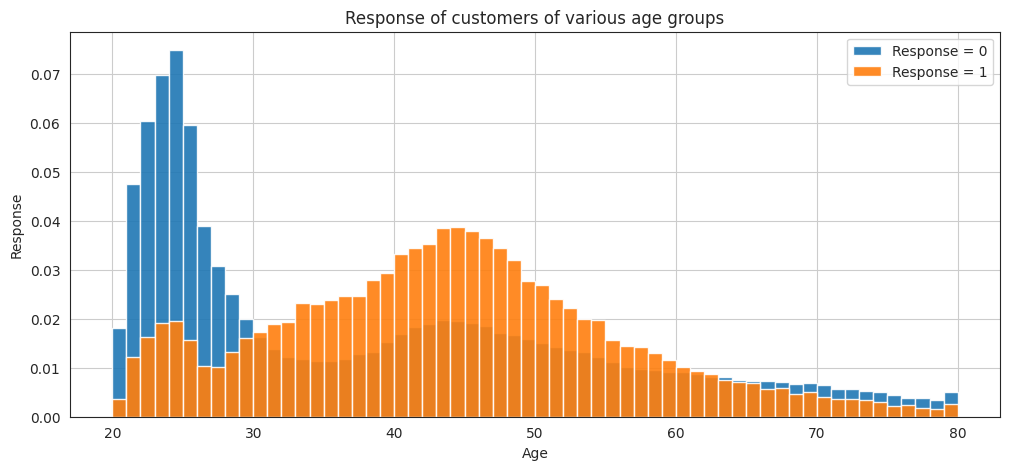

In [54]:
# Plotting a histogram.

df.groupby('res').age.hist(range=[20, 80], align = 'mid', bins=60, figsize=(12,5), density = True, alpha = .9)
plt.xlabel('Age')
plt.ylabel('Response')
plt.title('Response of customers of various age groups')
plt.legend(['Response = 0','Response = 1'])

* ***Customers in the age groups of 20 to 25 and 30 to 50 are the ones who are purchasing vehicle insurance.***

In [55]:
# Printing the total numbers in each age category.

a = pd.DataFrame(df['age'].value_counts(sort=True).reset_index())
pd.DataFrame(a.sort_index())

,index,age
0,24,25960
1,23,24256
2,22,20964
3,25,20636
4,21,16457
...,...,...
61,81,56
62,82,29
63,83,22
64,84,11


####**Region Code vs. Response**

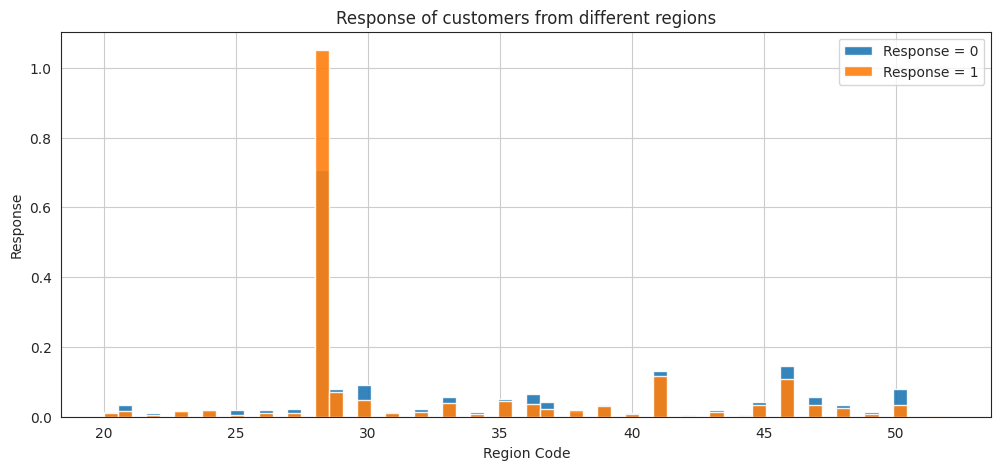

In [56]:
# Plotting a histogram.

df.groupby('res').rc.hist(range=[20, 52], align = 'mid', bins=60, figsize=(12,5), density = True, alpha = .9)
plt.xlabel('Region Code')
plt.ylabel('Response')
plt.title('Response of customers from different regions')
plt.legend(['Response = 0','Response = 1'])

* ***In the region whose code is 28, customers are purchasing the most vehicle insurance.***

In [57]:
# Printing the total numbers in each Region Code category.

a = pd.DataFrame(df['rc'].value_counts(sort=True).reset_index())
pd.DataFrame(a.sort_index())

,index,rc
0,28,106415
1,8,33877
2,46,19749
3,41,18263
4,15,13308
5,30,12191
6,29,11065
7,50,10243
8,3,9251
9,11,9232


####**Annual Premium vs. Response**

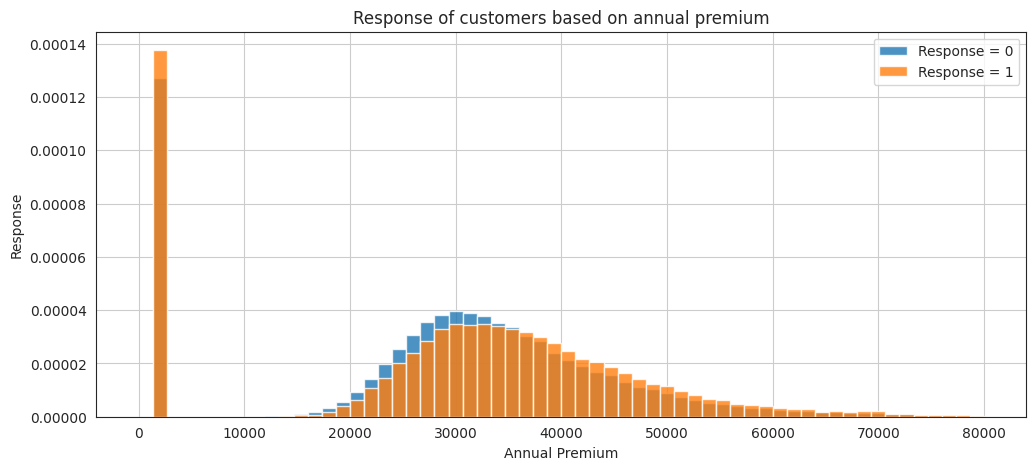

In [58]:
# Plotting a histogram.

df.groupby('res').ap.hist(range=[0, 80000], align = 'mid', bins=60, figsize=(12,5), density = True, alpha = .8)
plt.xlabel('Annual Premium')
plt.ylabel('Response')
plt.title('Response of customers based on annual premium')
plt.legend(['Response = 0','Response = 1'])

* ***The majority of customers with vehicle insurance would have to pay an annual premium of 2630, while others would pay in the range of 20,000 to 60,000.***

In [59]:
# Printing the total numbers in each annual premium category.

pd.DataFrame(df['ap'].value_counts(sort=True).reset_index())

,index,ap
0,2630,64877
1,69856,140
2,39008,41
3,38287,38
4,45179,38
...,...,...
48833,14838,1
48834,52535,1
48835,15182,1
48836,143525,1


####**PolicySalesChannel vs. Response**

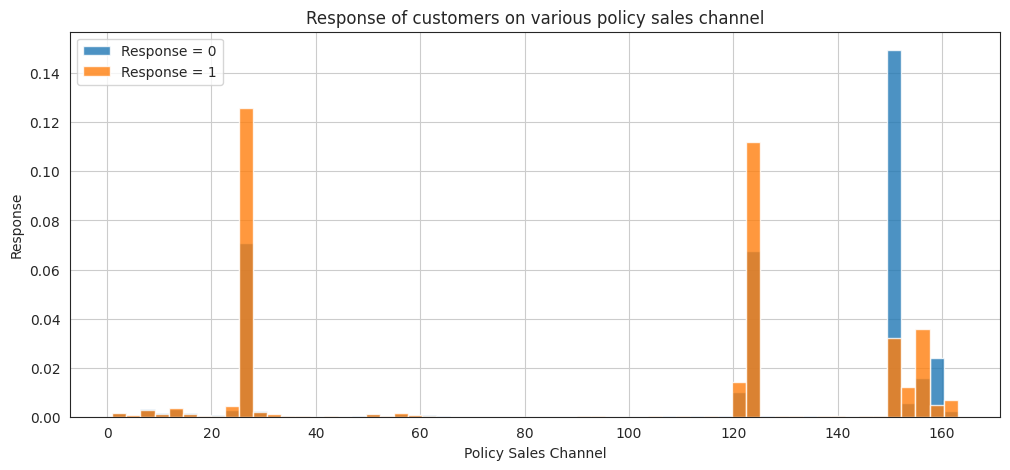

In [60]:
df.groupby('res').psc.hist(align = 'mid', bins=60, figsize=(12,5), density = True, alpha = .8)
plt.xlabel('Policy Sales Channel')
plt.ylabel('Response')
plt.title('Response of customers on various policy sales channel')
plt.legend(['Response = 0','Response = 1'])

* ***The majority of customers registered through policy sales channels 26 and 124 have purchased vehicle insurance.***

In [61]:
# Printing the total numbers of each category.

df['psc'].value_counts(sort=True).head(20)

152    134784
26      79700
124     73995
160     21779
156     10661
122      9930
157      6684
154      5993
151      3885
163      2893
13       1865
25       1848
7        1598
8        1515
30       1410
55       1264
155      1234
11       1203
1        1074
52       1055
Name: psc, dtype: int64

## **Multivariate Analysis**

***A multivariate analysis is a type in which more than two variable's are taken into consideration and underlying relationship between them is analysed.***

### **Sweetviz**

* ***Sweetviz is an open-source Python tool that provides attractive, high-density visualisations to jumpstart EDA (Exploratory Data Analysis) with just two lines of code. Output is a fully self-contained HTML application. The technology is designed to let users easily see target values and compare datasets.***

* ***We can use this technique even for predicting correlation between numerical and categorical features.***

In [62]:
!pip install sweetviz  # Installing sweetviz
import sweetviz as sv  # Importing sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 8.2 MB/s eta 0:00:00


In [63]:
rep = sv.analyze(df)      # Applying sweetviz on our dataset.

                                             |          | [  0%]   00:00 -> (? left)

Report rep.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



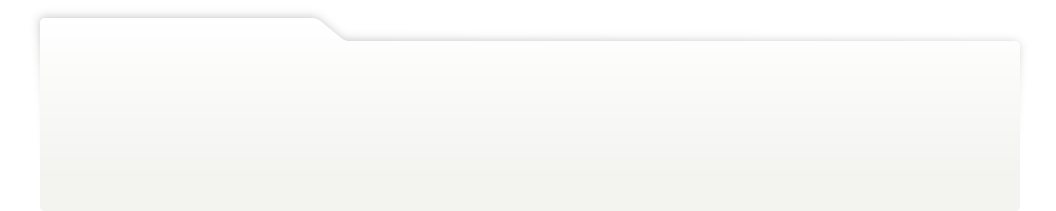
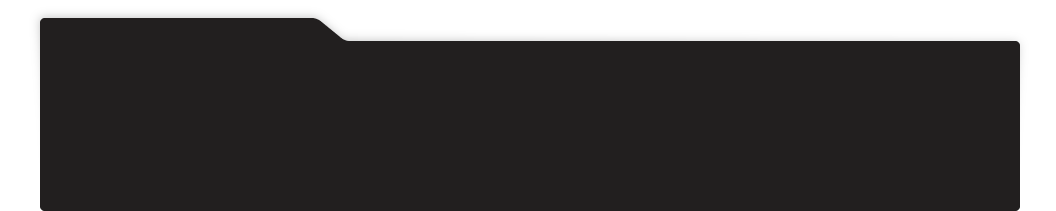
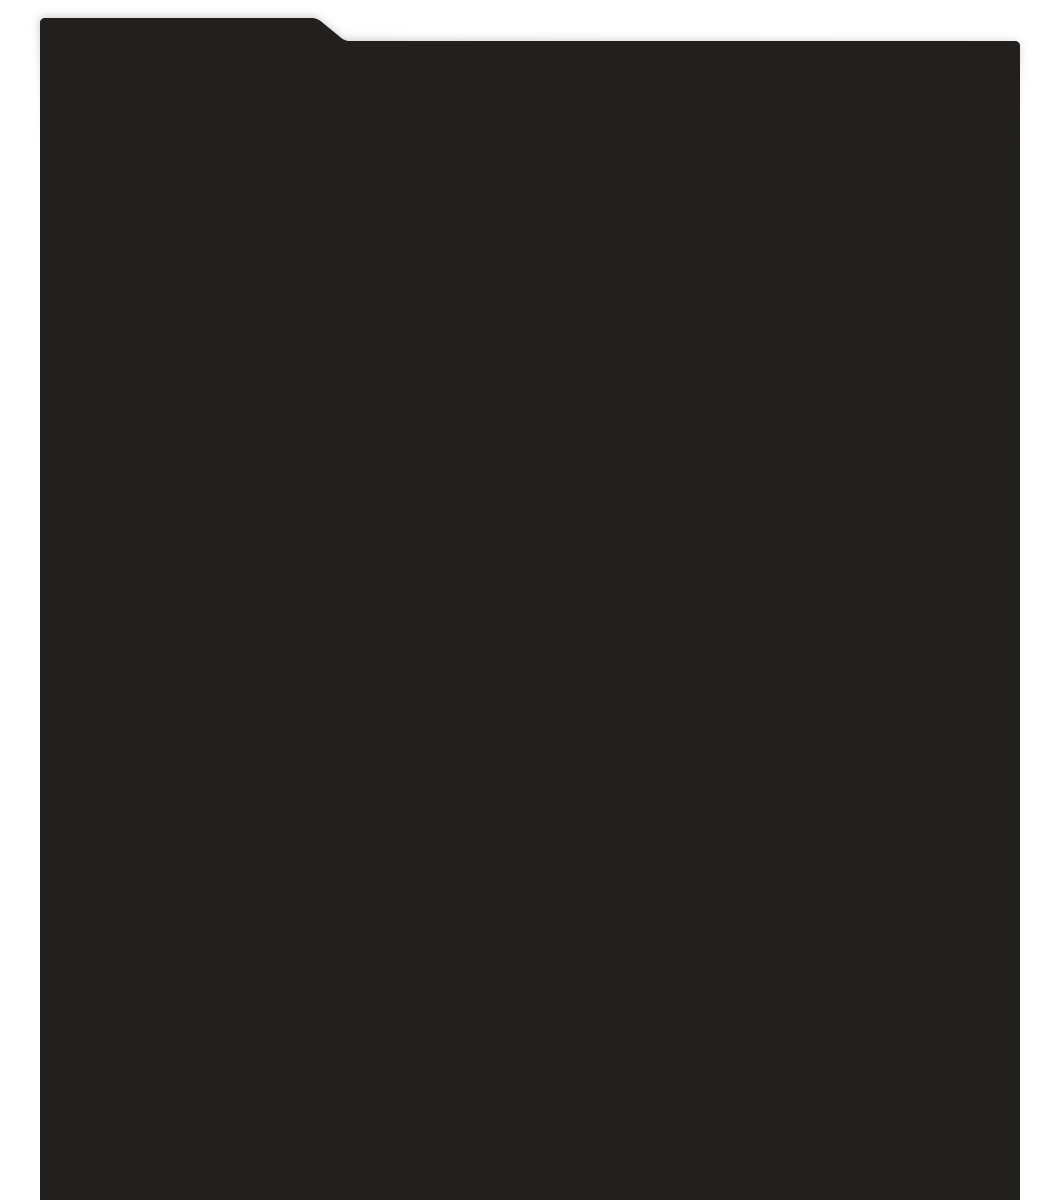
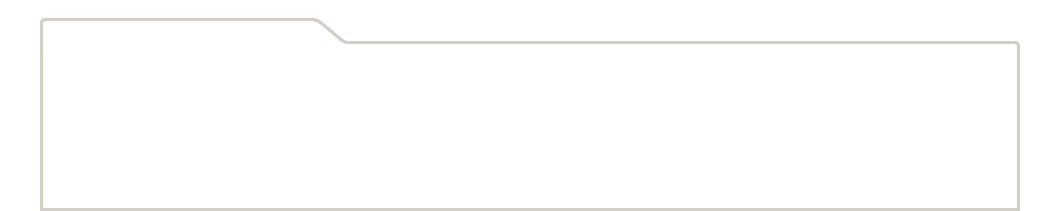
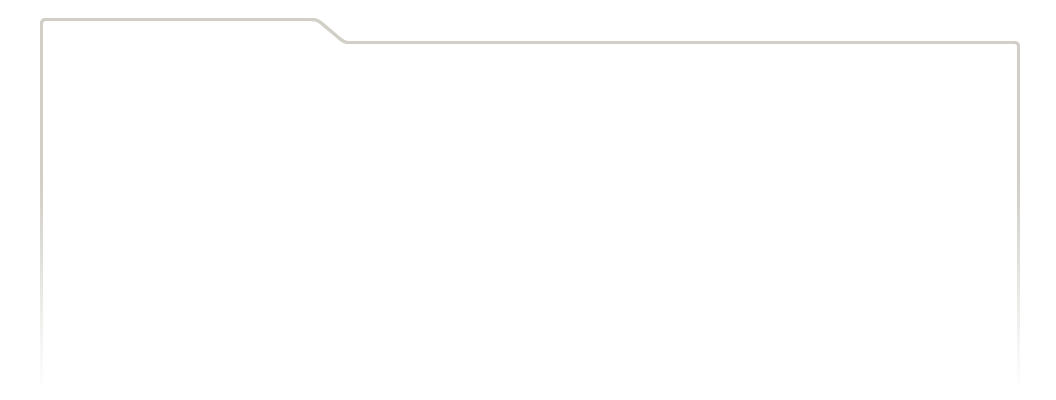
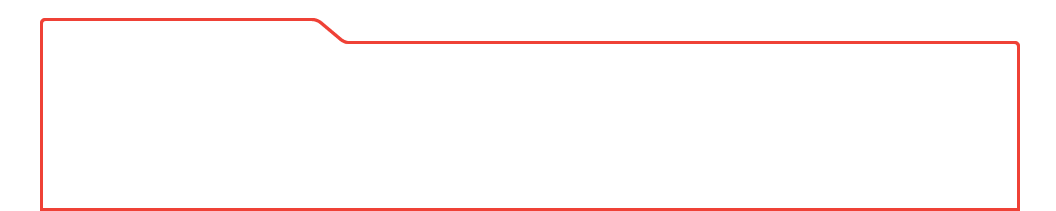
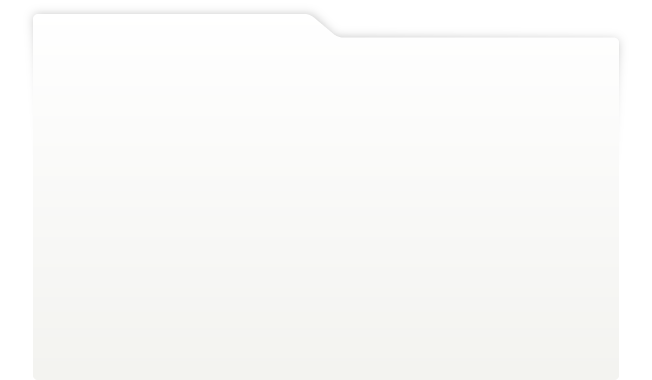
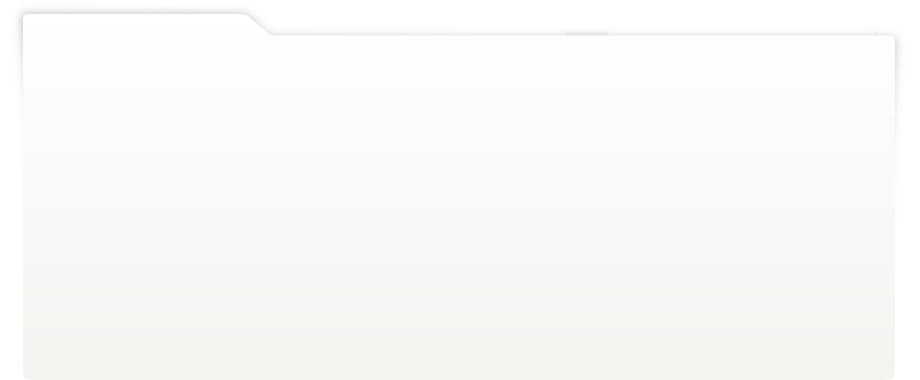
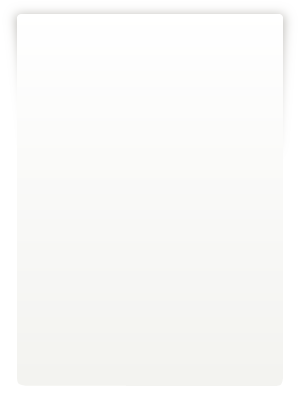
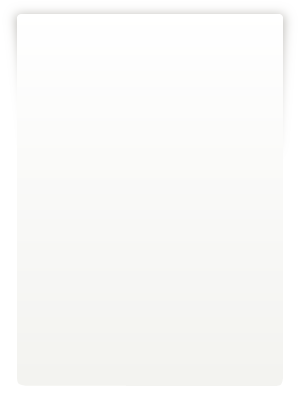
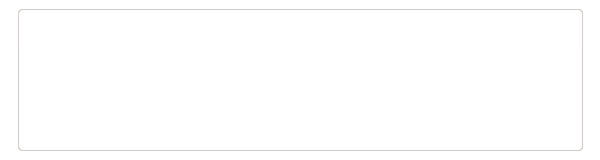
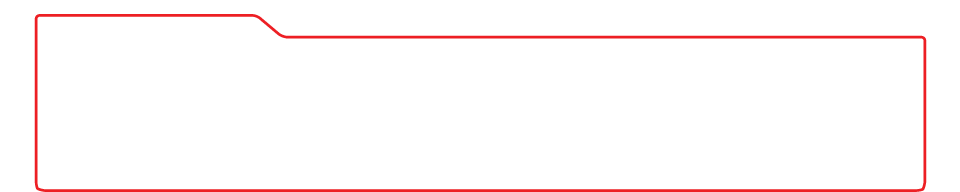
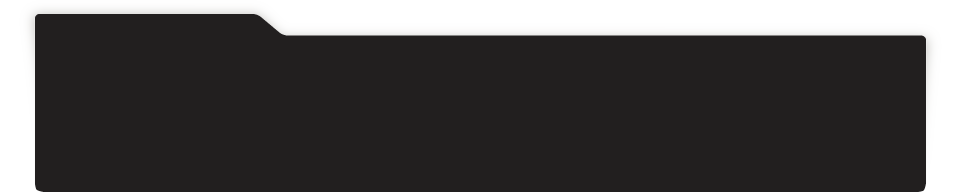
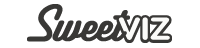
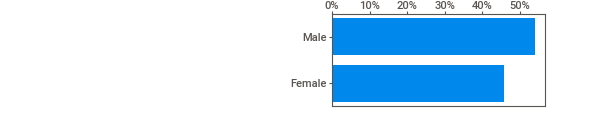
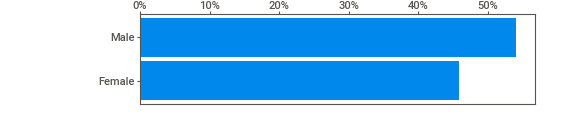
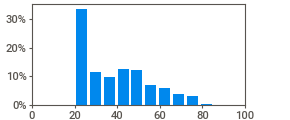
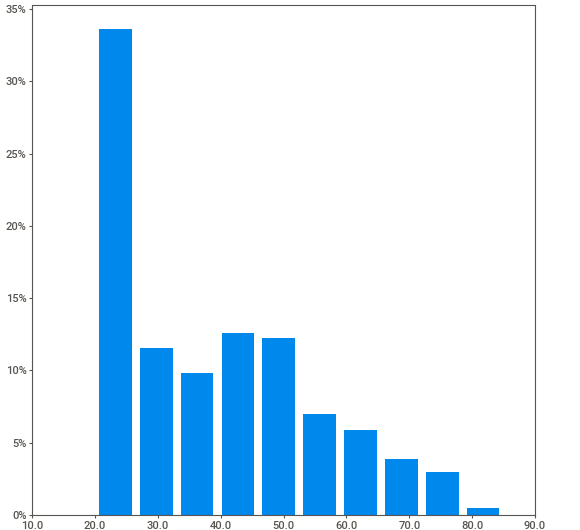
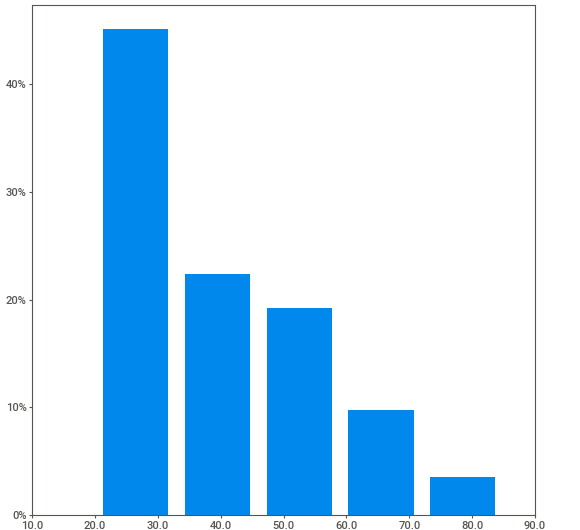
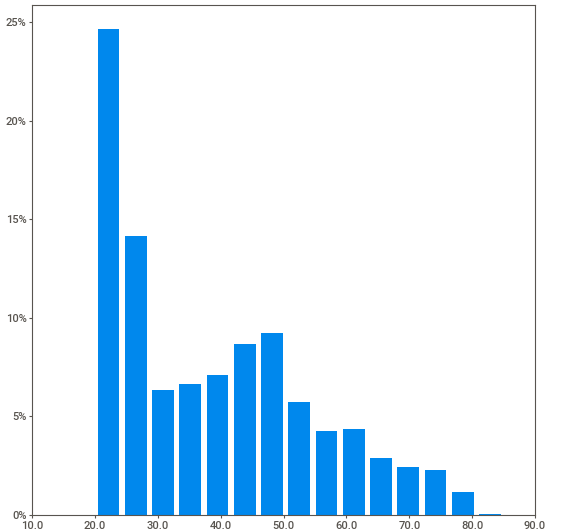
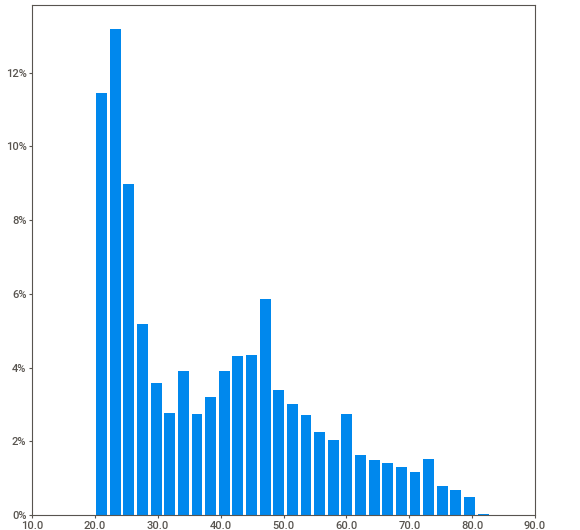
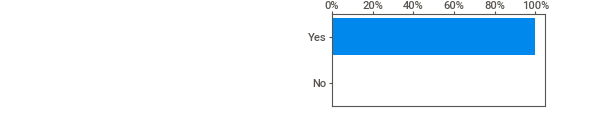
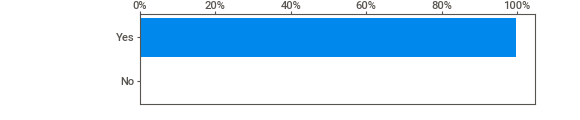
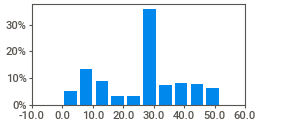
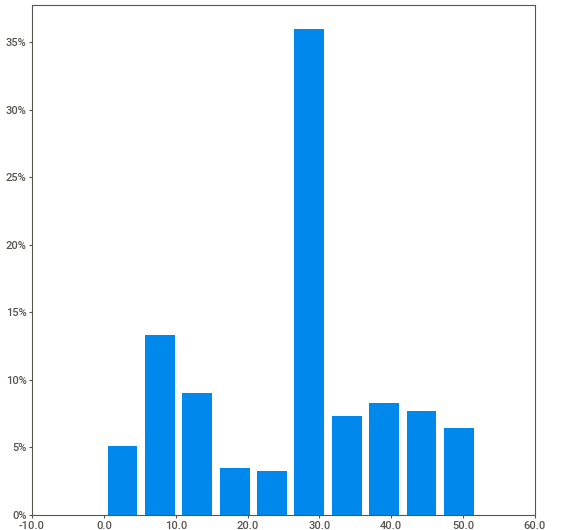
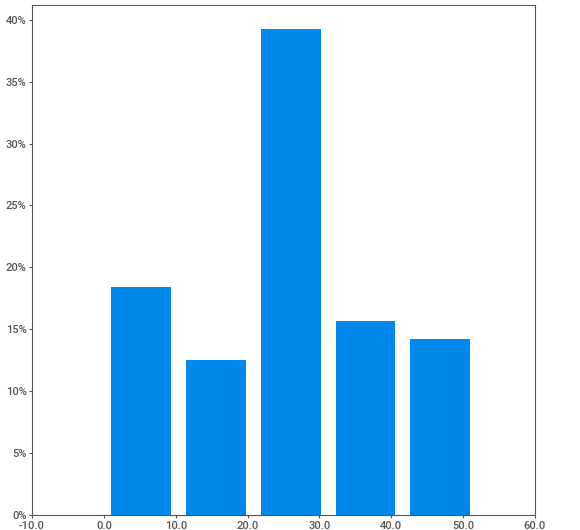
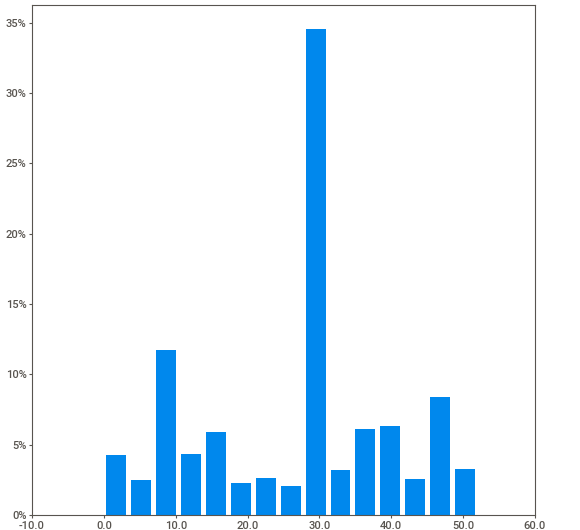
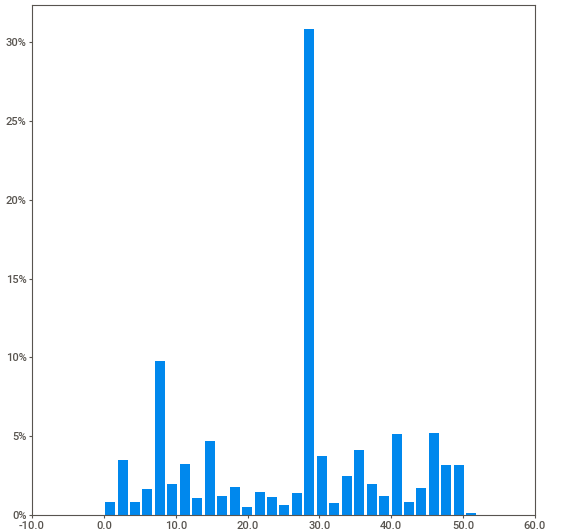
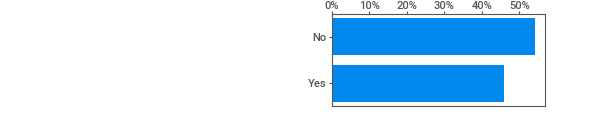
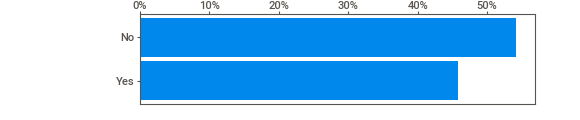
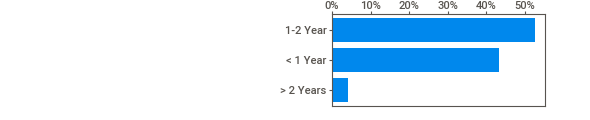
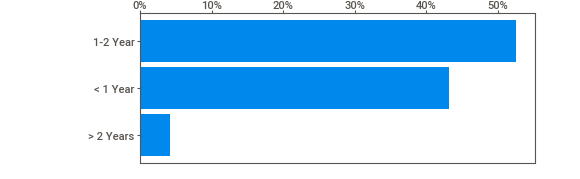
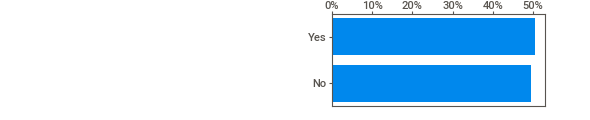
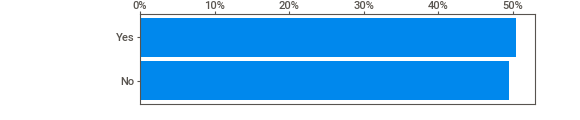
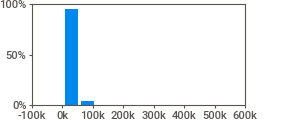
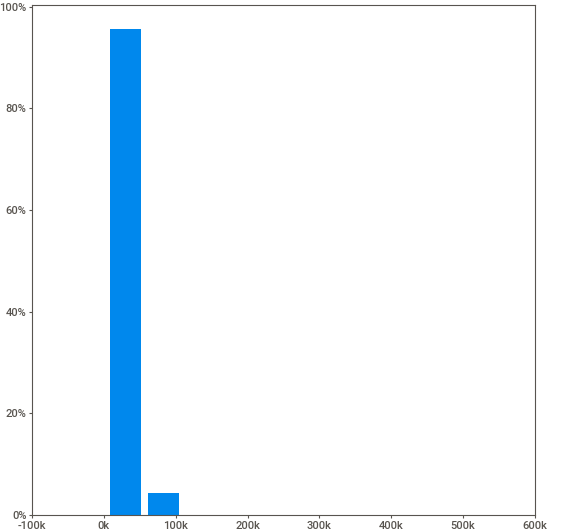
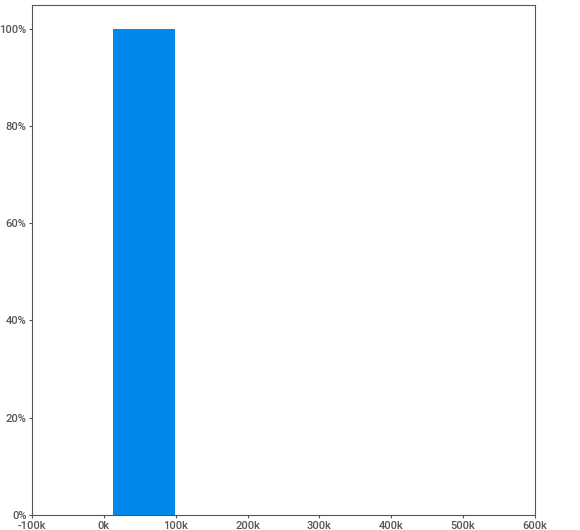
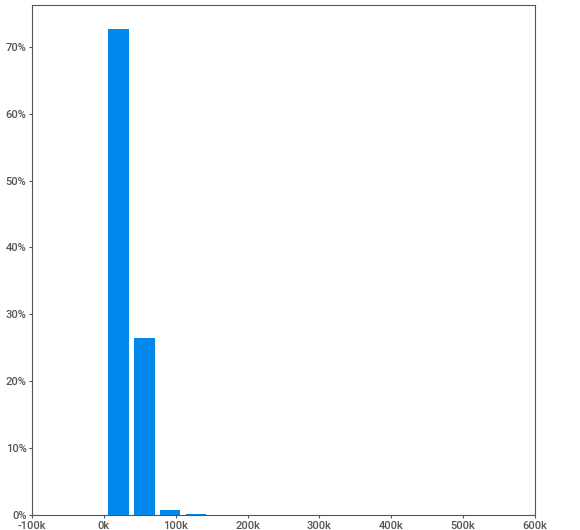
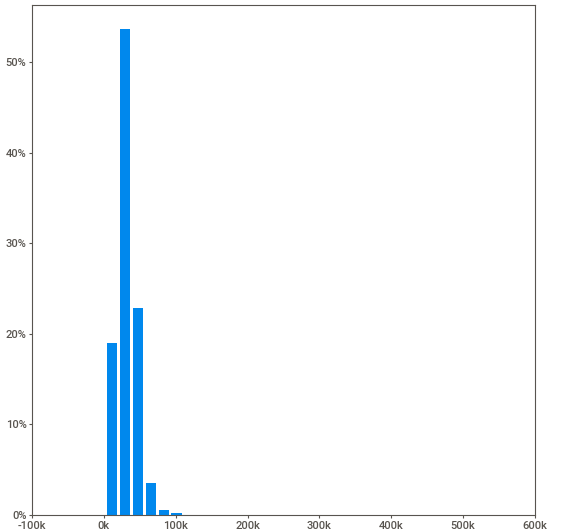
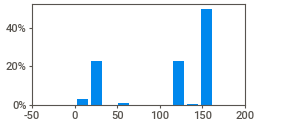
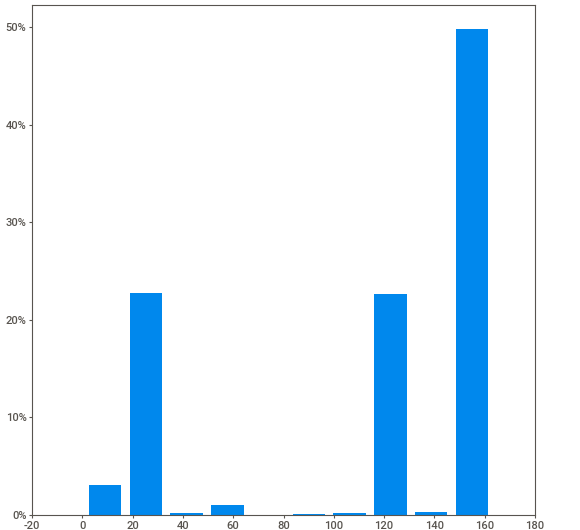
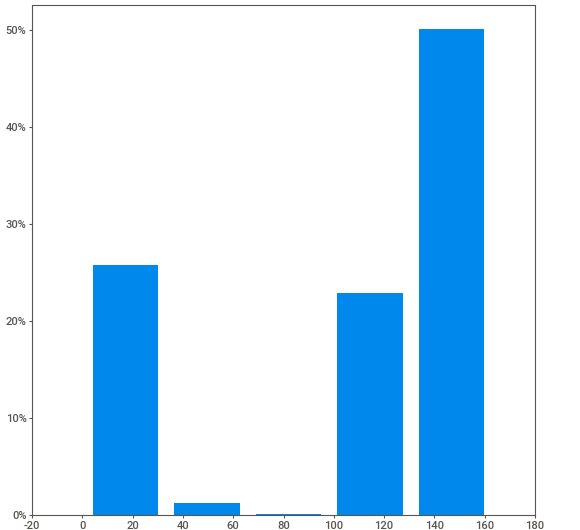
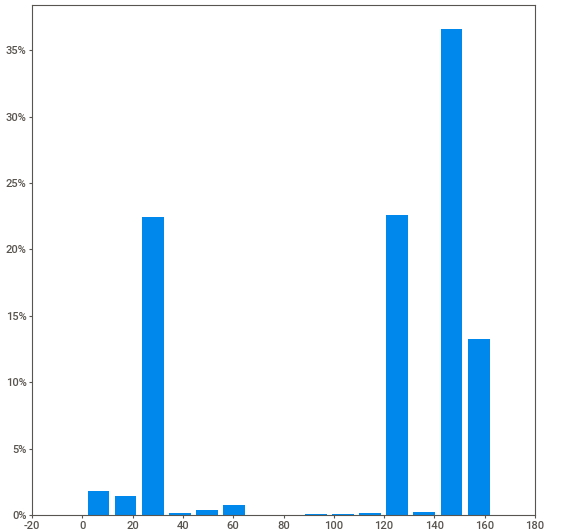
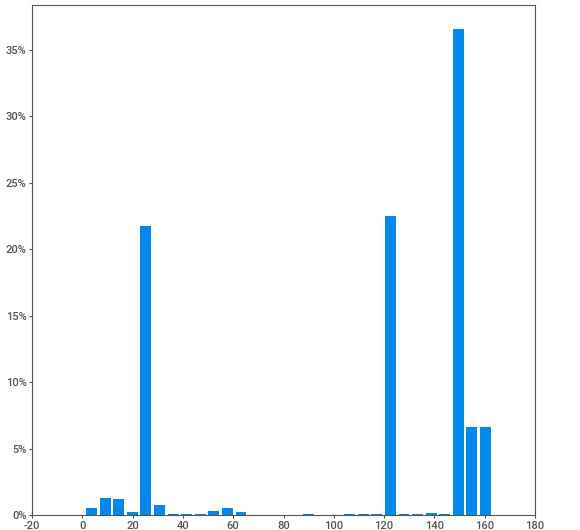
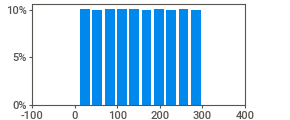
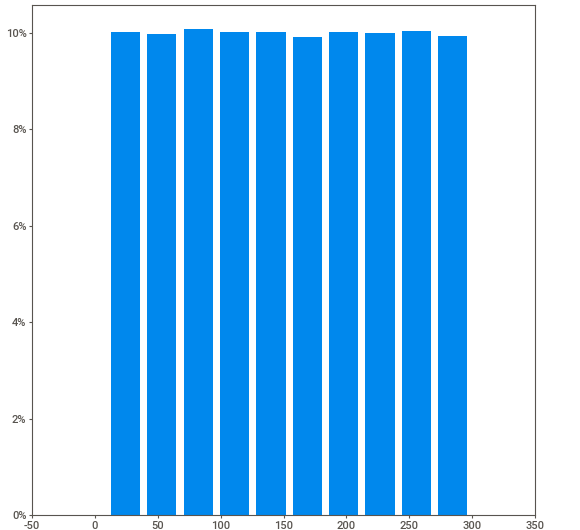
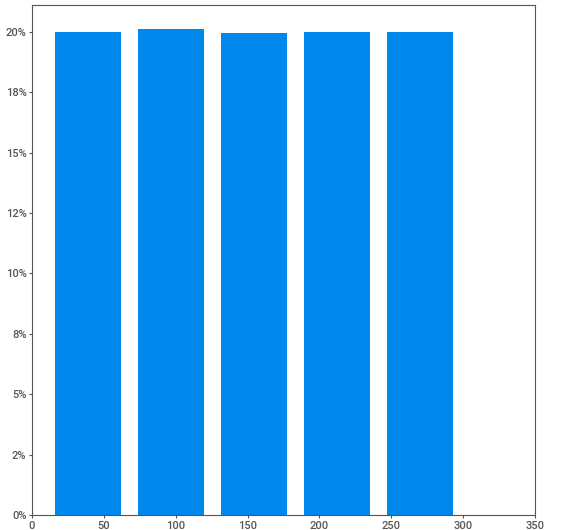
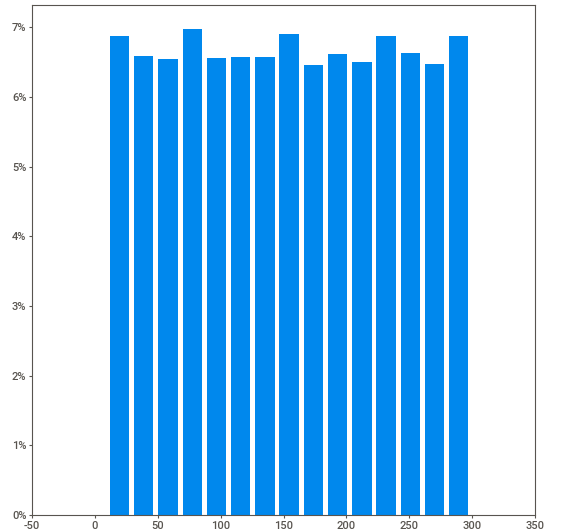
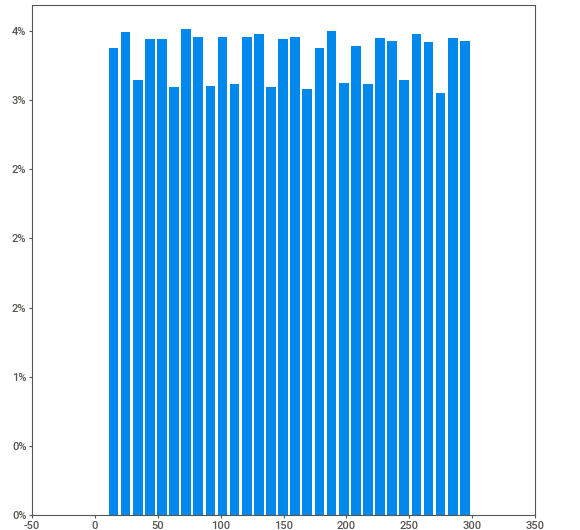
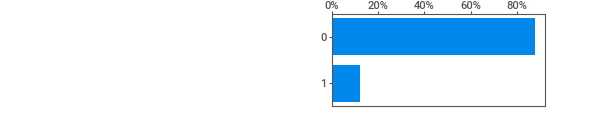
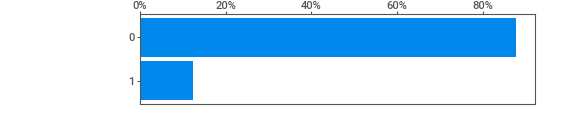
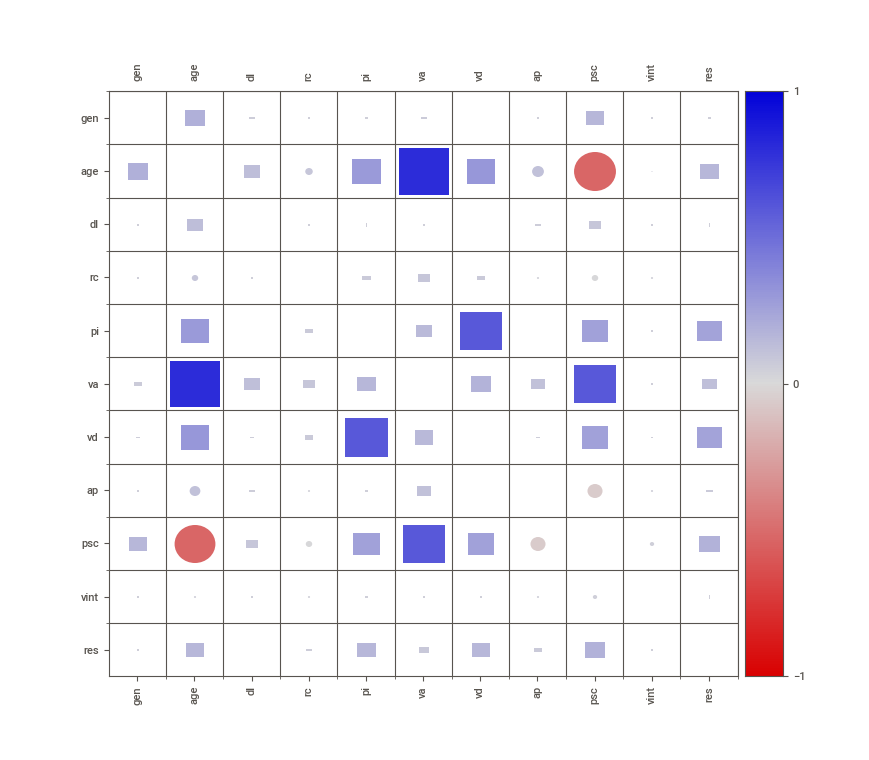
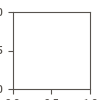

In [64]:
rep.show_html('rep.html') # Saving the report to an HTML file.

rep.show_notebook()       # Display the report in a Jupyter Notebook.

* ***Gender is showing positive correlation of 15 % with age and 11 % with policy sales channel.***

* ***Age is showing positive correlation of :-***
  *   **79 % with Vehicle Age.**
  *   **27 % with Vehicle Damage.**
  *   **25 % with Previously Insured.**
  *   **15 % with Gender.**
  *   **11 % with Response.**

* ***Previously Insured is showing positive correlation of :-***
  * **57 % with Vehicle Damage.**
  * **21 % with Response.**
  * **25 % % with Age.**
  * **22 % with Policy Sales Channel.**

* ***Vehicle Age is showing positive correlation of :-***
  * **79 % with Age.**
  * **57 % with Policy Sales Channel.**
  * **13 % with Vehicle Damage.**
  * **12 % with Previously Insured.**

* ***Vehicle Damage is showing positive correlation of :-***
  * **27 % with Age.**
  * **11 % with Vehicle Age.**
  * **21 % with Response.**
  * **58 % with Previously Insured.**

* ***Policy Sales Channel is showing positive correlation of :-***
  * **57 % with Vehicle Age.**
  * **22 % with Vehicle Damage.**
  * **14 % with Response.**
  * **22 % with Previously Insured.**

* ***RESPONSE is showing positive correlation of :-***
  * **3 % with Vehicle Age.**
  * **11 % with Vehicle Damage.**
  * **12 % with Previously Insured.**
  * **0 % with Driving License.**
  * **0 % with Gender.**
  * **14 %  with Policy Sales Channel.**
  * **11 % with Age.**
  * **2 % with Annual Premium.**

### **Correlation Heatmap**

**What is a correlation heatmap?**

* ***We can define a heatmap as a visual representation of the correlation between all the variables present in the data frame.***

* ***To represent this, it uses a system of colour palettes ranging from light to dark, demonstrating low to high positive or negative correlation.***

* ***It is helpful in showing correlation between numerical features.***

<Axes: >

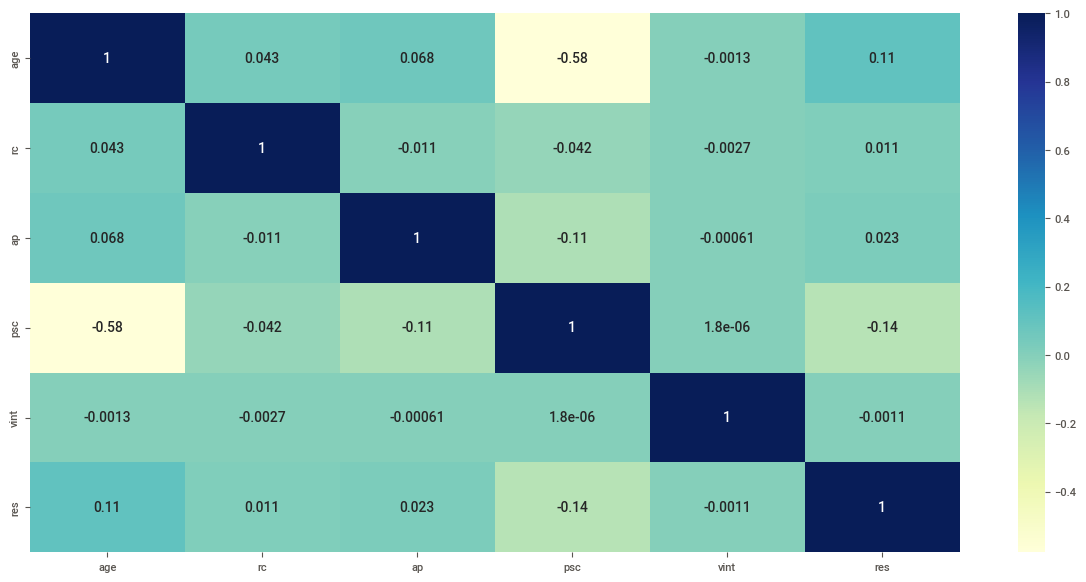

In [65]:
# Correlation heatmap of our dataset.

plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),cmap = 'YlGnBu',annot = True)

* ***AGE is strongly negatively correlated with POLICY SALES CHANNEL.***

#**Hypothesis Testing**

**What is Hypothesis testing?**

* ***We can define hypothesis testing as a method of statistical inference which is used to determine if the evidence at hand sufficiently supports a given hypothesis. Hypothesis testing enables us to make probabilistic assumptions regarding population parameters.***

* ***At first, we have to assume few hypothetical statements upon which we could perform hypothesis testing.***

* ***Let's assume these three statements :***

 * **The average yearly rate for auto insurance is more than 15,000.**

 *  **The average consumer is over 29 years old.**

 * **The yearly premium standard deviation is 15,000.**


 * **Formula to calculate hypothesis testing
 Z = ( x̅ – μ0 ) / (σ /√n),**

  **Here, x̅ is the sample mean,
 μ0 is the population mean,
 σ is the standard deviation,
 n is the sample size.**

###**Hypothetical Statement 1**

**This is our research hypothesis :**

* "**The average yearly rate for auto insurance is more than 15,000.**"

* **Null Hypothesis ($H_0$) : Average annual premium ¬> 15,000**

* **Alternate Hypothesis ($H_a$) : Average annual premium > 15,000**

In [66]:
# Performing appropriate statistical test for p-value.

hs = df['ap'].sample(600)     # Randomly taking sample of 600 data points.
hm = hs.mean()                # Calculating mean of those sampled data points.
hs = hs.std()                 # Calculating standard deviation of those sampled data points.

In [68]:
# Implementing hypothesis testing formula.

tf = (hm-15000)/(hs/(np.sqrt(600)))
tf

21.218037819423117

In [70]:
# Calculating probability.

from scipy.stats import norm
pro_z = norm.cdf(21.22, 0, 1)
print(pro_z)

1.0


In [71]:
# Calculating P-Value

p1 = 1-pro_z
p1

0.0

* **To get the p-value, we used the Z-test**.

* **We have enough data to reject $H_0$ because the likelihood we obtained is close to 100%. As a result, the average yearly rate for auto insurance is more than 15,000.**

###**Hypothetical Statement 2**

**This is our research hypothesis :**

* "**The average consumer is over 29 years old.**"

* **Null Hypothesis ($H_0$) : Average age ¬> 29**

* **Alternate Hypothesis ($H_a$) : Average age > 29**

In [72]:
# Performing appropriate statistical test for p-value.

hs = df['age'].sample(600)    # Randomly taking sample of 600 data points.
hm = hs.mean()                # Calculating mean of those sampled data points.
hs = hs.std()                 # Calculating standard deviation of those sampled data points.

In [79]:
# Implementing hypothesis testing formula.

tf = (hm-29)/(hs/(np.sqrt(600)))
tf

16.467927949923116

In [81]:
# Calculating probability.

from scipy.stats import norm
pro_z = norm.cdf(16.47, 0, 1)
print(pro_z)

1.0


In [82]:
# Calculating P-Value

p1 = 1-pro_z
p1

0.0

* **To get the p-value, we used the Z-test**.

* **We have enough data to reject $H_0$ because the likelihood we obtained is close to 100%. As a result, the average consumer is over 29 years old.**

###**Hypothetical Statement 3**

**This is our research hypothesis :**

* "**The yearly premium standard deviation is 15,000.**"

* **Null Hypothesis ($H_0$) : Standard deviation ¬> 15,000**

* **Alternate Hypothesis ($H_a$) : Standard deviation > 15,000**

In [86]:
# Performing appropriate statistical test for p-value.

hum = df['ap'].sample(90)    # Randomly taking sample of 90 data points.
hs = (np.std(hum))**2

In [89]:
# Computing test statistic.

ts = (49 * hs)/(15000*15000)
ts

56.78532420608176

In [90]:
# Calculating probability.

from scipy.stats import chi2
prob = chi2.cdf(135.69,49)
print(prob)

0.9999999995476738


* **To get the p-value, we used the Chi2-test.**

* **We picked the Chi2-test to calculate the p-value since we are doing hypothesis testing for standard deviation. We have enough data to reject $H_0$ based on the likelihood we obtained of 99%. As a result, the yearly premium standard deviation is 15,000.**

#**Feature Engineering and Data-preprocessing**

##**Data Transformation and Handling Outliers**

In [123]:
from sklearn.ensemble import IsolationForest
import pandas as pd

# Load the dataset
#data = pd.read_csv('your_dataset.csv')

# Specify the features (independent variables)
#X = data[['feature1', 'feature2', 'feature3', ...]]

# Fit the Isolation Forest model
isolation_forest = IsolationForest(contamination=0.05)  # Specify the contamination parameter
isolation_forest.fit(numf)

# Predict outlier scores
outlier_scores = isolation_forest.decision_function(numf)

# Set a threshold for outlier detection
threshold = -0.2  # Adjust the threshold based on your dataset and requirements

# Identify and remove outliers
outliers = numf[outlier_scores < threshold]

# Remove outliers from the original dataset
clean_data = df.drop(outliers.index)

# Print the number of outliers and the cleaned dataset
print("Number of outliers:", len(outliers))
print("Cleaned dataset shape:", clean_data.shape)


Number of outliers: 0
Cleaned dataset shape: (381109, 11)


<Axes: xlabel='ap'>

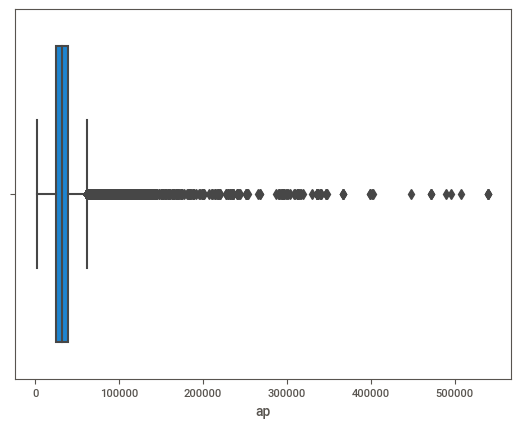

In [134]:
sns.boxplot(x=df['ap'])